# I will be implementing a CNN for classification of roasted coffee beans into 4 categories.
# Dataset is available at [dataset](https://www.kaggle.com/datasets/gpiosenka/coffee-bean-dataset-resized-224-x-224)

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [26]:
df = pd.read_csv('/kaggle/input/coffee-bean-dataset-resized-224-x-224/Coffee Bean.csv')
df.head()

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train


In [27]:
label_counts = df['labels'].value_counts()

print("Count of labels in the column:")
print(label_counts)

Count of labels in the column:
labels
Dark      400
Green     400
Light     400
Medium    400
Name: count, dtype: int64


#### therefore dataset is balanced. No need of augmentation.

## Visualising data

In [28]:
import tensorflow as tf
print(tf.__version__)
train_dir = '/kaggle/input/coffee-bean-dataset-resized-224-x-224/train'
train_data = tf.keras.utils.image_dataset_from_directory(train_dir)

2.15.0
Found 1200 files belonging to 4 classes.


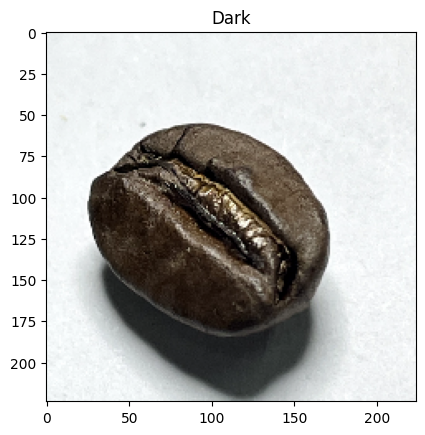

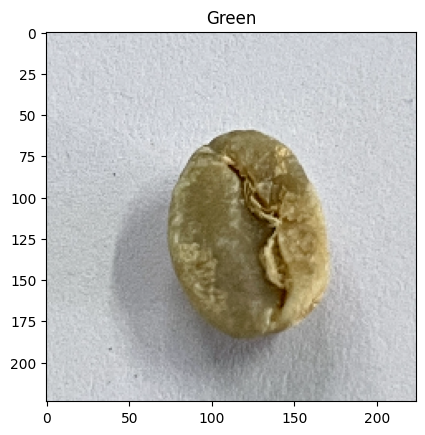

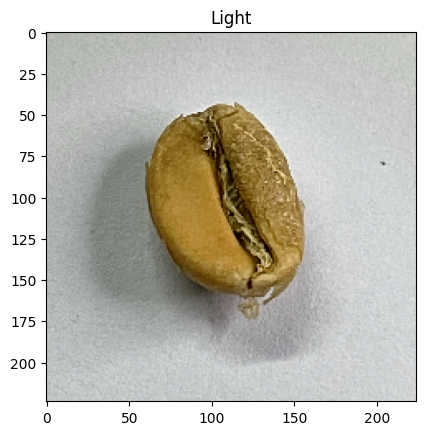

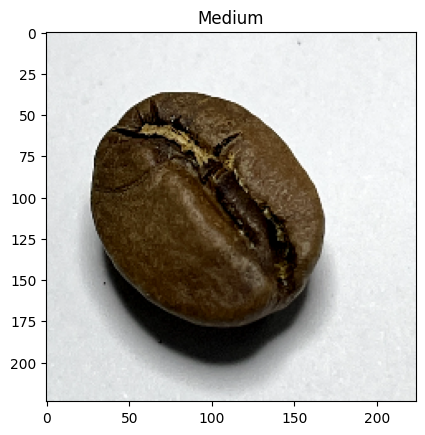

In [29]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class_folders = train_data.class_names

for folder in class_folders:
    files = os.listdir(os.path.join(train_dir, folder))
    
    image_path = os.path.join(train_dir, folder, files[0])
    
    image = mpimg.imread(image_path)
    plt.imshow(image)
    plt.title(folder)  # Set the title to the folder name
#     plt.axis('off')     # Turn off axis labels
    plt.show()


## Resizing the images in our training data

In [30]:
import os
import cv2
import random

IMG_SIZE = 50

categories = train_data.class_names

for category in categories :
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)

# creating a list for training data
training_data = []

def create_training_data():
    for category in categories :
        path = os.path.join(train_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.asarray(y)

In [31]:
# normalising the data
X = X/255.0
X.shape

(1200, 50, 50, 3)

## Building the model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


model = Sequential([
    Input(shape=X.shape[1:]),

    Conv2D(32, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation("relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),

    Dense(128),
    Activation("relu"),

    Dense(128),
    Activation("relu"),

    Dense(4),
    Activation("softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 48, 48, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_13 (Activation)      │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 9, 9, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4)              │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,548 (799.02 KB)

 Trainable params: 204,548 (799.02 KB)

 Non-trainable params: 0 (0.00 B)

## Training the model

Epoch 1/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - accuracy: 0.3258 - loss: 1.2649 - val_accuracy: 0.5417 - val_loss: 0.8123
Epoch 2/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6155 - loss: 0.7444 - val_accuracy: 0.7417 - val_loss: 0.5868
Epoch 3/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7917 - loss: 0.4426 - val_accuracy: 0.9083 - val_loss: 0.2812
Epoch 4/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9465 - loss: 0.1740 - val_accuracy: 0.8750 - val_loss: 0.2816
Epoch 5/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9437 - loss: 0.1392 - val_accuracy: 0.9500 - val_loss: 0.1376
Epoch 6/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9275 - loss: 0.1835 - val_accuracy: 0.8750 - val_loss: 0.2542
Epoch 7/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9408 - loss: 0.1456 - val_accuracy: 0.9750 - val_loss: 0.1209
Epoch 8/10
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9633 - loss: 0.0991 - val_accuracy: 0.9417 - val_loss

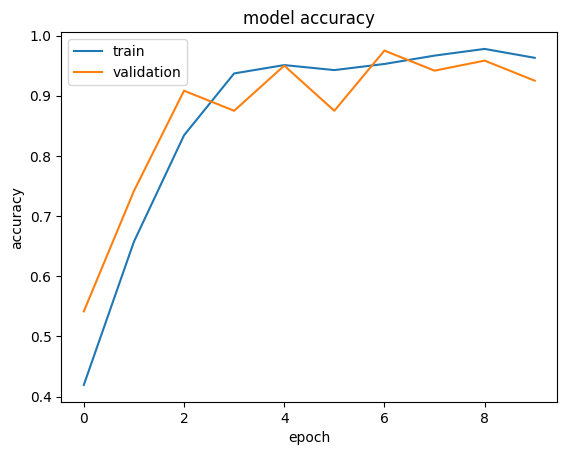

In [33]:
history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.1)

print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

## Testing the model on test data

In [34]:
test_dir = '/kaggle/input/coffee-bean-dataset-resized-224-x-224/test'
test_data = tf.keras.utils.image_dataset_from_directory(test_dir)

Found 400 files belonging to 4 classes.


In [35]:
import os
import cv2
import random

IMG_SIZE = 50

categories = test_data.class_names

for category in categories :
    path = os.path.join(test_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)

# creating a list for testing data
testing_data = []

def create_testing_data():
    for category in categories :
        path = os.path.join(test_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try :
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_UNCHANGED)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

create_testing_data()

random.shuffle(testing_data)

X_test = [] #features
y_test = [] #labels

for features, label in training_data:
    X_test.append(features)
    y_test.append(label)

X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_test = np.asarray(y_test)

## Inferences for classification

In [36]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_classes)

print("Accuracy:", accuracy)


50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.956875


In [38]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[341   0   0  59]
 [  0 400   0   0]
 [  0   0 395   5]
 [  2   1   2 395]]


In [39]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred_classes)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.92       400
           1       1.00      1.00      1.00       400
           2       0.99      0.99      0.99       400
           3       0.86      0.99      0.92       400

    accuracy                           0.96      1600
   macro avg       0.96      0.96      0.96      1600
weighted avg       0.96      0.96      0.96      1600

